# **Improving Employee Retention By Predicting Employee Attrition Using Machine Learning**

### **Import Libraries and Settings**

In [38]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [39]:
df = pd.read_csv('Dataset CSV Version.csv')

In [40]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
83,brainyRice8,106245,Bercerai,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,CareerBuilder,3,3.0,6.0,0.0,6.0,+6289935357xxx,brainyRice8142@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-04-04,2015-2-16,2020-02-11,-
101,lazyPorpoise0,100957,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Kurang,Jakarta Pusat,Google_Search,3,3.0,0.0,0.0,18.0,+6281937385xxx,lazyPorpoise0172@yahoo.com,Sarjana,1,NaN,masih_bekerja,1976-09-22,2011-2-21,2014-02-01,-
263,alertDoughnut7,110277,Belum_menikah,Pria,FullTime,Product Manager,Senior_level,Sangat_bagus,Jakarta Barat,LinkedIn,3,5.0,0.0,0.0,1.0,+6281316733xxx,alertDoughnut7481@yahoo.com,Magister,1,NaN,NaN,1983-07-10,2011-07-05,2020-1-17,-
119,mildBuck3,106697,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,CareerBuilder,4,3.0,5.0,0.0,11.0,+6281832158xxx,mildBuck3345@outlook.com,Magister,1,NaN,tidak_bisa_remote,1988-05-05,2015-01-05,2016-4-15,2016-01-11
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08


In [41]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 287
Number of columns 25


The original dataframe has 287 rows and 25 columns.

In [42]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Username,object,0,0.00,0,285,"[spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7]"
1,EnterpriseID,int64,0,0.00,0,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,0,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,0,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,0,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,0,14,"[Software Engineer (Back End), Data Analyst, Software Engineer (Front End), Product Manager, Software Engineer (Android)]"
6,JenjangKarir,object,0,0.00,0,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,0,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Kurang]"
8,AsalDaerah,object,0,0.00,0,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, Jakarta Selatan, Jakarta Barat]"
9,HiringPlatform,object,0,0.00,0,9,"[Employee_Referral, Website, Indeed, LinkedIn, CareerBuilder]"


## **About The Dataset**

**Overview:**
- Dataset contains 287 rows, 25 features.

- Dataset consists of 3 data types; float64, int64 and object.

- `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, `TanggalResign` feature will be changed from object into datetime data type.

- Dataset contains null values in various columns, will be handled after checking the distribution for proper imputation method. As for `IkutProgramLOP` will directly drop since it has high missing percentage. Also some columns that have "-" values will need to be considered as null values and filtered later. We only have 287 rows of data which is very small so dropping rows might not be the best approach for our model training.

- Some columns like `SkorSurveyEngagement`, `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, `IkutProgramLOP` have float data type when it doesn't actually need or representative in decimal value, these feature data type will be changed to integer.

- `PernahBekerja` column have invalid value, it normally should be binary but instead it has 1 and yes. This column will be dropped or the values will need to be re-checked.

- Originally there is no column to determine whether an employee resigned or not, this will be extracted from `TanggalResign` column later.

- (Optional) Changing the name of some columns or the values to standardize the overall writing format might be necessary. For values it probably more prioritized because the format varies so much compared to column names, as for the format of the values will follow `Pekerjaan` column format (ex: Product Manager, Data Analyst, etc)

**Feature Descriptions**

- `Username`: Username of the employee account
- `EnterpriseID`: ID of the employee in the company
- `StatusPernikahan`: Marital status of the employee
- `JenisKelamin`: Gender of the employee
- `StatusKepegawaian`: Employment status of the employee
- `Pekerjaan`: Role of the employee
- `JenjangKarir`: Level of experience of the employee
- `PerformancePegawai`: Employee performance category score
- `AsalDaerah`: Employee region of origin
- `HiringPlatform`: Platform the employee application is accepted
- `SkorSurveyEngagement`: Level of employee engagement within the organization
- `SkorKepuasanPegawai`: Level of how satisfied employees are with their job and the workplace
- `JumlahKeikutsertaanProjek`: Number of times the employee join a project
- `JumlahKeterlambatanSebulanTerakhir`: Number of times the employee is late
- `JumlahKetidakhadiran`: Number of times the employee is absent
- `NomorHP`: Handphone number of the employee
- `Email`: Personal email of the employee
- `TingkatPendidikan`: Education level Handphone number of the employee
- `PernahBekerja`: Whether the employee have previous work experience or not
- `IkutProgramLOP`: Whether the employee join LOP Program or not
- `AlasanResign`: Reason for resignation of the employee
- `TanggalLahir`: Birth date of the employee
- `TanggalHiring`: Hiring date of the employee
- `TanggalPenilaianKaryawan`: Scoring date of the employee
- `TanggalResign`: Resignation date of the employee

## Initial Transformation

In [43]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

Even if the 'yes' value in `PernahBekerja` column originally should be 0, this column doesn't mean anything. So this column will be drop also because it doesn't provide valuable information
for analysis or modeling.

In [44]:
# Drop columns that have invalid and large missing percentage
df.drop(columns=['PernahBekerja', 'IkutProgramLOP'], inplace=True)

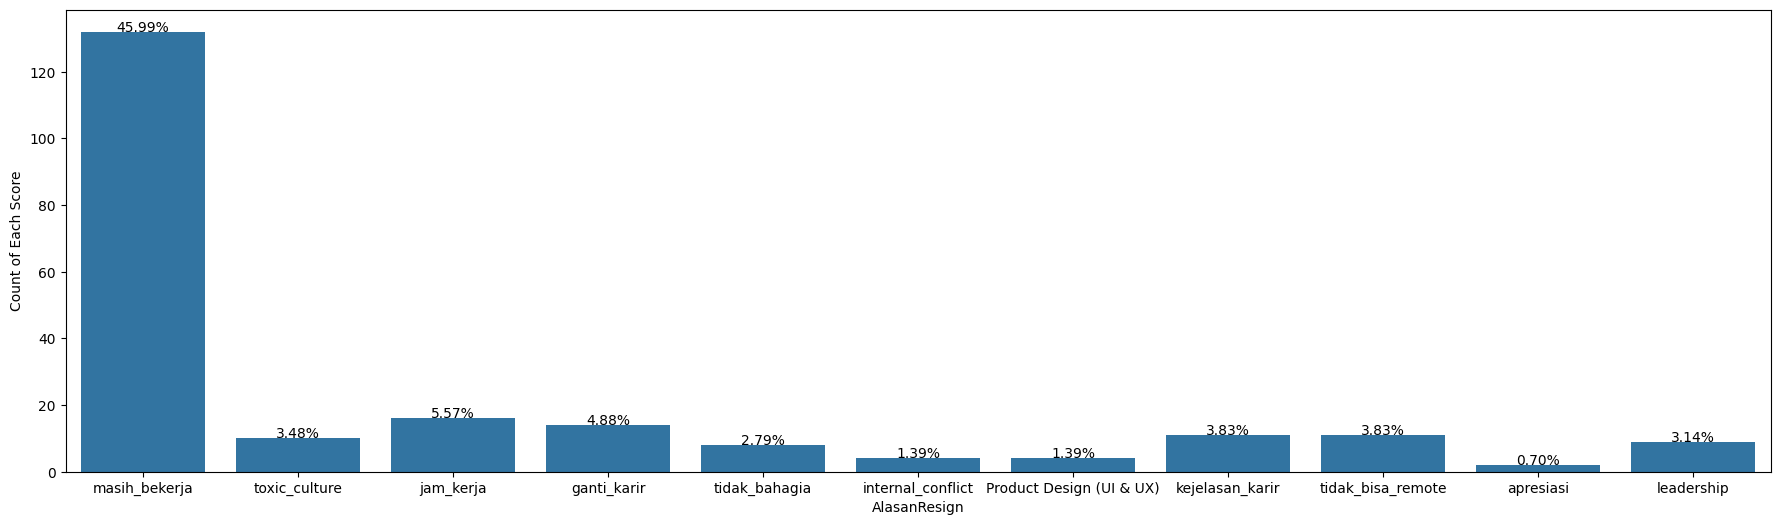

In [45]:
# Check categorical distribution for AlasanResign column for proper imputation method
plt.figure(figsize=(22, 6))
ax = sns.countplot(data=df, x='AlasanResign')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Score')
plt.show()

In [46]:
# Additional analysis for AlasanResign column imputation - NaN value imputation
df[df['AlasanResign'].isna()]['TanggalResign'].value_counts()

TanggalResign
-    66
Name: count, dtype: int64

- As we can see that all the null values of AlasanResign column is actually data where the employee resigned. Since we will extract this column as new column whether a employee resigned or not, this it's not the best solution to impute the value with mode since it will make the value of AlasanResign into 'Masih Bekerja', but in reality they already resigned.

- Which is why as for the missing values in AlasanResign we will impute with 'Other Reasons', we also will replace the 'Product Design (UI & UX)' with that values.

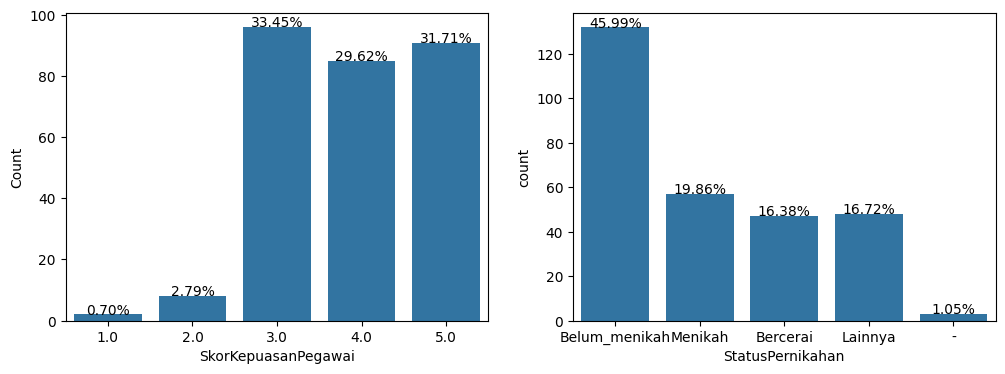

In [47]:
# Check categorical distribution for SkorKepuasanPegawai and StatusPernikahan column for proper imputation method
impute_cat_cols = ['SkorKepuasanPegawai', 'StatusPernikahan']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, col in enumerate(impute_cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i])

    # Calculate the percentage for each category and annotate bars
    total = float(len(df))
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x() + p.get_width() / 2.,
                    height + 0.1,
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center")

ax[0].set_ylabel('Count')
plt.show()

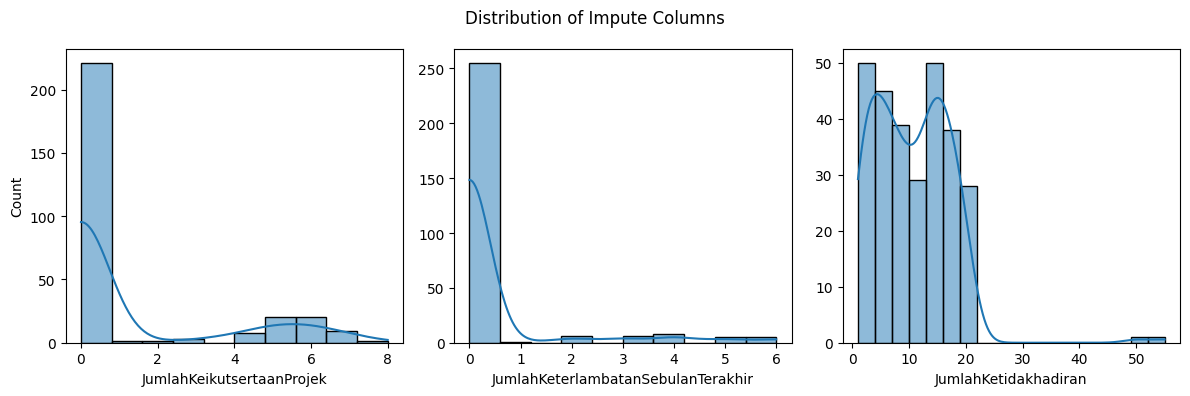

In [48]:
# Checking distribution in numerical columns with missing value for proper imputation method
impute_num_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot histograms for each column
for i, col in enumerate(impute_num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

> Imputation method based on distribution and other factors:

- `AlasanResign` : value of 'Other Reasons'
- `SkorKepuasanPegawai` : median
- `StatusPernikahan` : mode
- `JumlahKeikutsertaanProjek` : mode (will most definitely the same as it's median)
- `JumlahKeterlambatanSebulanTerakhir` : mode (will most definitely the same as it's median)
- `JumlahKetidakhadiran` : median

In [49]:
# Impute missing values and replace invalid/out of context values
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mode()[0])
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0])
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df['AlasanResign'] = df['AlasanResign'].fillna('Other Reasons')

df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-' : df['StatusPernikahan'].mode()[0]})
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (Ui & Ux)' : 'Other Reasons'})

In [50]:
# Rename value names in some columns to maintain format similarity
def column_values_correction(column_values):
    new_column_values = []
    for value in column_values:
        if isinstance(value, str):
            # Split the value by underscores and capitalize each word
            words = value.split('_')
            titled_words = [word.title() for word in words]
            
            # Join the words with spaces
            new_value = ' '.join(titled_words)
            new_column_values.append(new_value)
        else:
            # If the value is not a string (e.g., NaN), keep it unchanged
            new_column_values.append(value)
    return new_column_values

# List of columns for correction
selected_columns = ['StatusPernikahan', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'HiringPlatform', 'AlasanResign']

# Process the specified columns
for column in selected_columns:
    df[column] = column_values_correction(df[column].values)

In [51]:
# Re-check the corrected values in format of titled (ex:Data Analyst)
for col in selected_columns :
    display(df[col].unique()[:])

array(['Belum Menikah', 'Menikah', 'Bercerai', 'Lainnya'], dtype=object)

array(['Outsource', 'Fulltime', 'Internship'], dtype=object)

array(['Freshgraduate Program', 'Senior Level', 'Mid Level'], dtype=object)

array(['Sangat Bagus', 'Sangat Kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

array(['Employee Referral', 'Website', 'Indeed', 'Linkedin',
       'Careerbuilder', 'Diversity Job Fair', 'Google Search',
       'On-Line Web Application', 'Other'], dtype=object)

array(['Masih Bekerja', 'Toxic Culture', 'Jam Kerja', 'Ganti Karir',
       'Tidak Bahagia', 'Internal Conflict', 'Product Design (Ui & Ux)',
       'Kejelasan Karir', 'Tidak Bisa Remote', 'Apresiasi',
       'Other Reasons', 'Leadership'], dtype=object)

As we can see now the categorical values have the same format.

In [52]:
?pd.to_datetime

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

In [53]:
# Data types correction

# Float to integer data type correction
float_to_int = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df[float_to_int] = df[float_to_int].astype(int)

# String to datetime data type correction
str_to_date = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for col in str_to_date :
    if col != 'TanggalResign' :
        df[col] = pd.to_datetime(df[col])
    else :
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [54]:
# Grouping columns based on data types
cats_cols = ['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
            'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
            'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
            'NomorHP', 'Email', 'TingkatPendidikan', 'AlasanResign']

nums_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

In [55]:
for col in impute_num_cols :
    print(df[col].value_counts())
    print()

JumlahKeikutsertaanProjek
0    224
6     20
5     20
7      9
4      8
3      3
1      1
2      1
8      1
Name: count, dtype: int64

JumlahKeterlambatanSebulanTerakhir
0    256
4      8
3      6
2      6
5      5
6      5
1      1
Name: count, dtype: int64

JumlahKetidakhadiran
4     20
2     20
15    19
16    17
7     17
6     16
10    16
14    16
3     16
13    15
19    15
17    14
1     14
20    13
9     12
11    12
8     10
5      9
12     7
18     7
50     1
55     1
Name: count, dtype: int64



The numerical are all discrete type.

- Categorical columns (16 columns): 
    - `Username` : nominal
    - `EnterpriseID` : nominal
    - `StatusPernikahan` : nominal
    - `JenisKelamin` : nominal
    - `StatusKepegawaian` : nominal
    - `Pekerjaan` : nominal
    - `JenjangKarir` : ordinal
    - `PerformancePegawai` : ordinal
    - `AsalDaerah` : nominal
    - `HiringPlatform` : nominal
    - `SkorSurveyEngagement` : ordinal
    - `SkorKepuasanPegawai` : ordinal
    - `NomorHP` : nominal
    - `Email` : nominal
    - `TingkatPendidikan` : ordinal
    - `AlasanResign` : nominal

- Numerical columns (3 columns) :

    - `JumlahKeterlambatanSebulanTerakhir` : discrete
    - `JumlahKetidakhadiran` : discrete
    - `JumlahKeikutsertaanProjek` : discrete

- Date column (4 column) :
    -  `TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign`

## Feature Engineering

### StatusKerja

The `StatusKerja` column is the target variable for our project, it explains whether an employee resigned or not.

In [56]:
# Create new feature "StatusKerja"
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if pd.isnull(x) else 'Tidak Bekerja')

In [57]:
df['StatusKerja'].value_counts()

StatusKerja
Masih Bekerja    198
Tidak Bekerja     89
Name: count, dtype: int64

### Datetime Components

In [58]:
date_cols

['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

Datetime components that we will analyze will only related to hiring and resignation date.

In [59]:
# Hiring components
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['BulanHiring'] = df['TanggalHiring'].dt.month
df['HariHiring'] = df['TanggalHiring'].dt.day

# Resign components
df['TahunResign'] = df['TanggalResign'].dt.year
df['BulanResign'] = df['TanggalResign'].dt.year
df['HariResign'] = df['TanggalResign'].dt.year

In [60]:
df.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,TahunHiring,BulanHiring,HariHiring,TahunResign,BulanResign,HariResign
102,brainyFish3,111083,Menikah,Pria,Outsource,Data Analyst,Freshgraduate Program,Sangat Bagus,Jakarta Barat,Google Search,3,3,0,0,20,+6285960968xxx,brainyFish3571@hotmail.com,Sarjana,Toxic Culture,1984-05-09,2012-04-02,2014-02-20,2018-06-08,Tidak Bekerja,2012,4,2,2018.0,2018.0,2018.0
254,pitifulMallard6,111176,Bercerai,Wanita,Outsource,Product Manager,Mid Level,Sangat Kurang,Jakarta Selatan,Google Search,3,5,4,0,14,+6281977529xxx,pitifulMallard6993@outlook.com,Magister,Jam Kerja,1987-11-07,2013-11-11,2020-01-14,2018-06-08,Tidak Bekerja,2013,11,11,2018.0,2018.0,2018.0
167,trustingCrane4,111198,Menikah,Pria,Fulltime,Product Manager,Mid Level,Biasa,Jakarta Utara,Website,2,4,0,0,7,+6283126068xxx,trustingCrane4883@icloud.com,Sarjana,Masih Bekerja,1984-07-01,2016-07-06,2020-01-29,NaT,Masih Bekerja,2016,7,6,NaN,NaN,NaN


# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [61]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary.rename(columns={'50%' : 'median'}, inplace=True)

nums_summary

,count,mean,std,min,25%,median,75%,max,range,coefficient of variation
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0,8.0,1.958057
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0,6.0,3.096238
JumlahKetidakhadiran,287.0,10.439024,6.829769,1.0,5.0,10.0,15.0,55.0,54.0,0.654254


In [62]:
# Categorical columns (integer dtype)
cats_summary_int = df[cats_cols].describe().transpose()
cats_summary_int

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,287.0,3.905923,0.905423,1.0,3.0,4.0,5.0,5.0


In [63]:
# Categorical columns (object dtype)
cats_cols = df.select_dtypes(include='object').columns.tolist()

# Create the summary DataFrame for these columns
cats_summary_str = df[cats_cols].describe().transpose()

# Calculate 'bottom' and 'freq_bottom' values for each column
cats_summary_str['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary_str['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

# Display the resulting DataFrame
cats_summary_str

,count,unique,top,freq,bottom,freq_bottom
Username,287,285,boredEggs0,2,spiritedPorpoise3,1
StatusPernikahan,287,4,Belum Menikah,135,Bercerai,47
JenisKelamin,287,2,Wanita,167,Pria,120
StatusKepegawaian,287,3,Fulltime,217,Internship,4
Pekerjaan,287,14,Software Engineer (Back End),109,Product Design (UX Researcher),1
JenjangKarir,287,3,Freshgraduate Program,169,Senior Level,48
PerformancePegawai,287,5,Biasa,85,Sangat Kurang,24
AsalDaerah,287,5,Jakarta Pusat,72,Jakarta Selatan,45
HiringPlatform,287,9,Indeed,85,On-Line Web Application,1
NomorHP,287,287,+6282232522xxx,1,+6282232522xxx,1


In [64]:
# Date columns
dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

,count,mean,min,25%,50%,75%,max,date_data_range
TanggalLahir,287,1979-02-14 01:15:15.679442496,1951-01-02 00:00:00,1973-12-03 00:00:00,1980-09-30 00:00:00,1986-05-31 00:00:00,1992-08-17 00:00:00,15203 days 00:00:00
TanggalHiring,287,2013-02-04 23:14:50.592334592,2006-01-09 00:00:00,2011-07-11 00:00:00,2013-04-01 00:00:00,2014-08-18 00:00:00,2018-07-09 00:00:00,4564 days 00:00:00
TanggalPenilaianKaryawan,287,2018-09-29 18:48:55.191637504,2011-07-14 00:00:00,2017-05-03 12:00:00,2020-01-16 00:00:00,2020-02-04 00:00:00,2020-02-28 00:00:00,3151 days 00:00:00
TanggalResign,89,2017-03-20 15:38:25.617977600,2013-05-30 00:00:00,2015-06-15 00:00:00,2017-11-15 00:00:00,2018-06-08 00:00:00,2020-09-27 00:00:00,2677 days 00:00:00


## Univariate Analysis

### Numerical

In [65]:
nums_cols

['JumlahKeikutsertaanProjek',
 'JumlahKeterlambatanSebulanTerakhir',
 'JumlahKetidakhadiran']

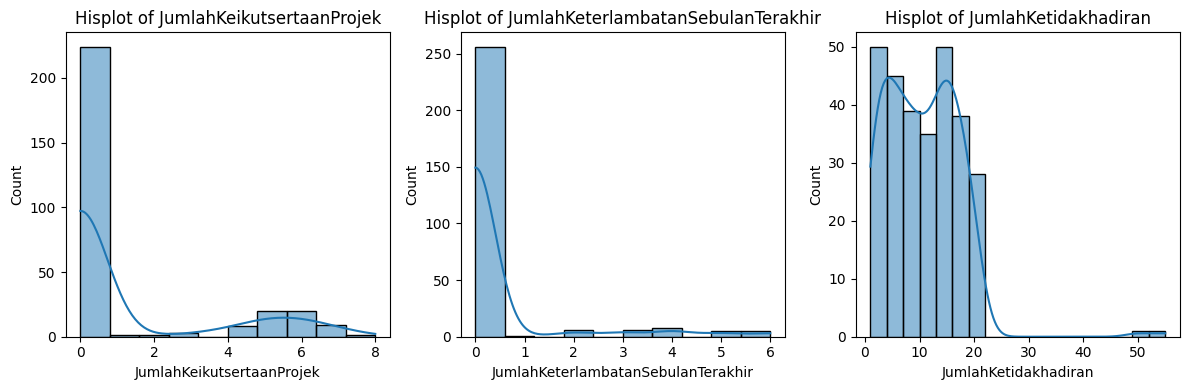

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, ax = ax[i], x=col, kde=True)
    ax[i].set_title(f'Hisplot of {col}')

plt.tight_layout()
plt.show()

In [67]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,JumlahKeikutsertaanProjek,1.565,0.702,Highly Positively Skewed
1,JumlahKeterlambatanSebulanTerakhir,3.118,8.674,Highly Positively Skewed
2,JumlahKetidakhadiran,1.588,8.241,Highly Positively Skewed


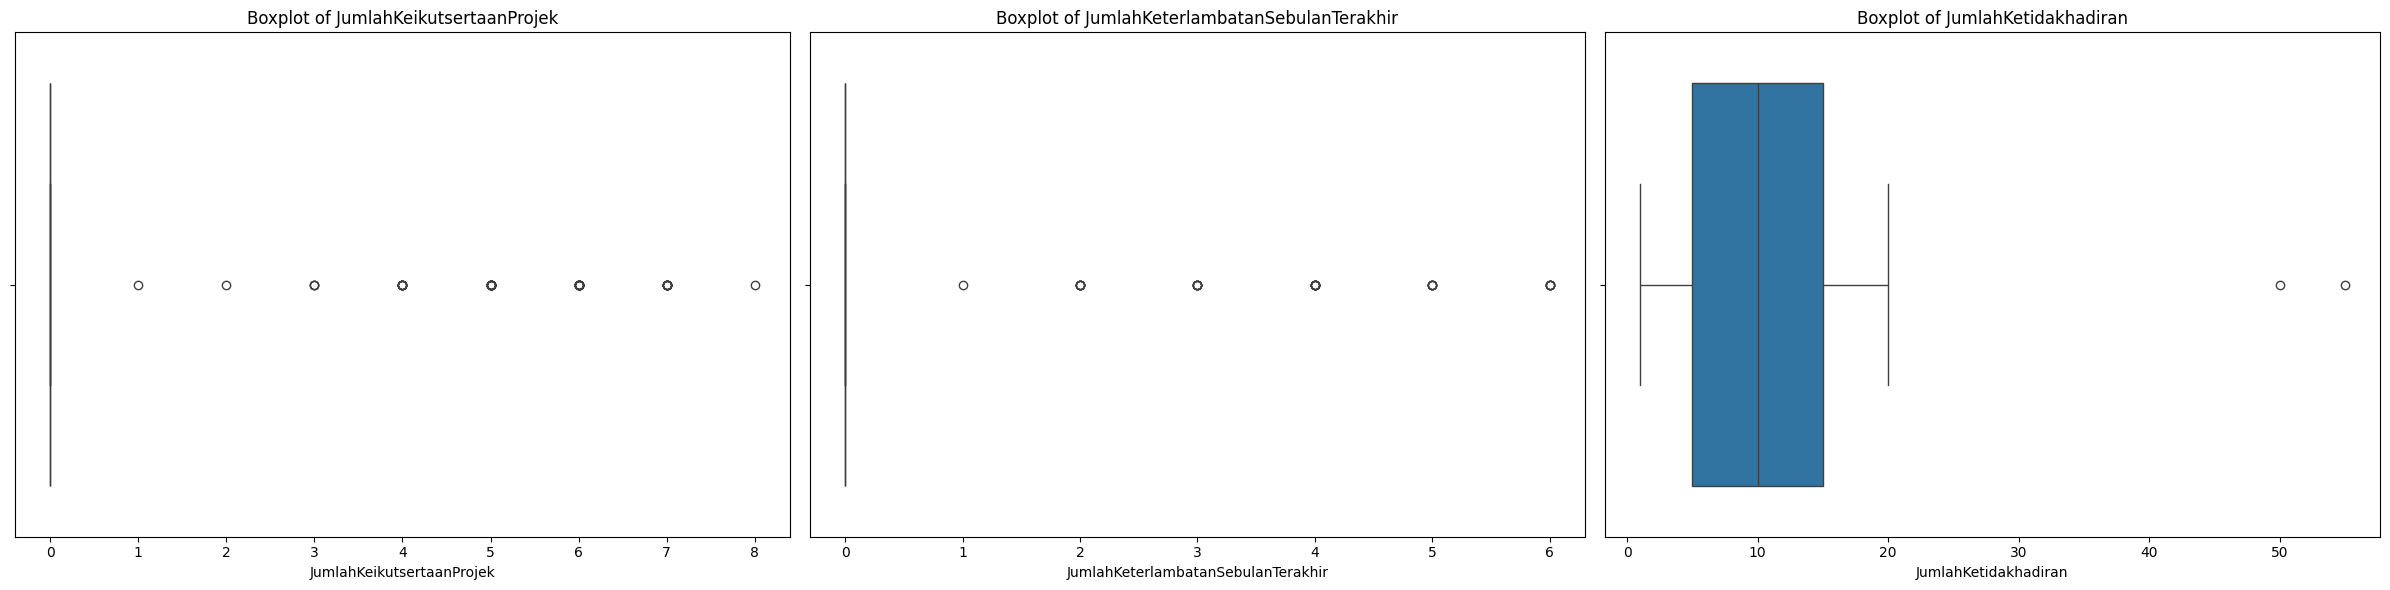

In [68]:
# Boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [69]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 287
Amount of Outlier Rows : 91
Amount of Non-Outlier Rows : 196
Percentage of Outliers : 31.71



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Percentage of Outlier
0,JumlahKeikutsertaanProjek,True,0.0,0.0,63,224,21.951220
1,JumlahKeterlambatanSebulanTerakhir,True,0.0,0.0,31,256,10.801394
2,JumlahKetidakhadiran,True,-10.0,30.0,2,285,0.696864


### Categorical 

In [70]:
cats_cols

['Username',
 'StatusPernikahan',
 'JenisKelamin',
 'StatusKepegawaian',
 'Pekerjaan',
 'JenjangKarir',
 'PerformancePegawai',
 'AsalDaerah',
 'HiringPlatform',
 'NomorHP',
 'Email',
 'TingkatPendidikan',
 'AlasanResign',
 'StatusKerja']

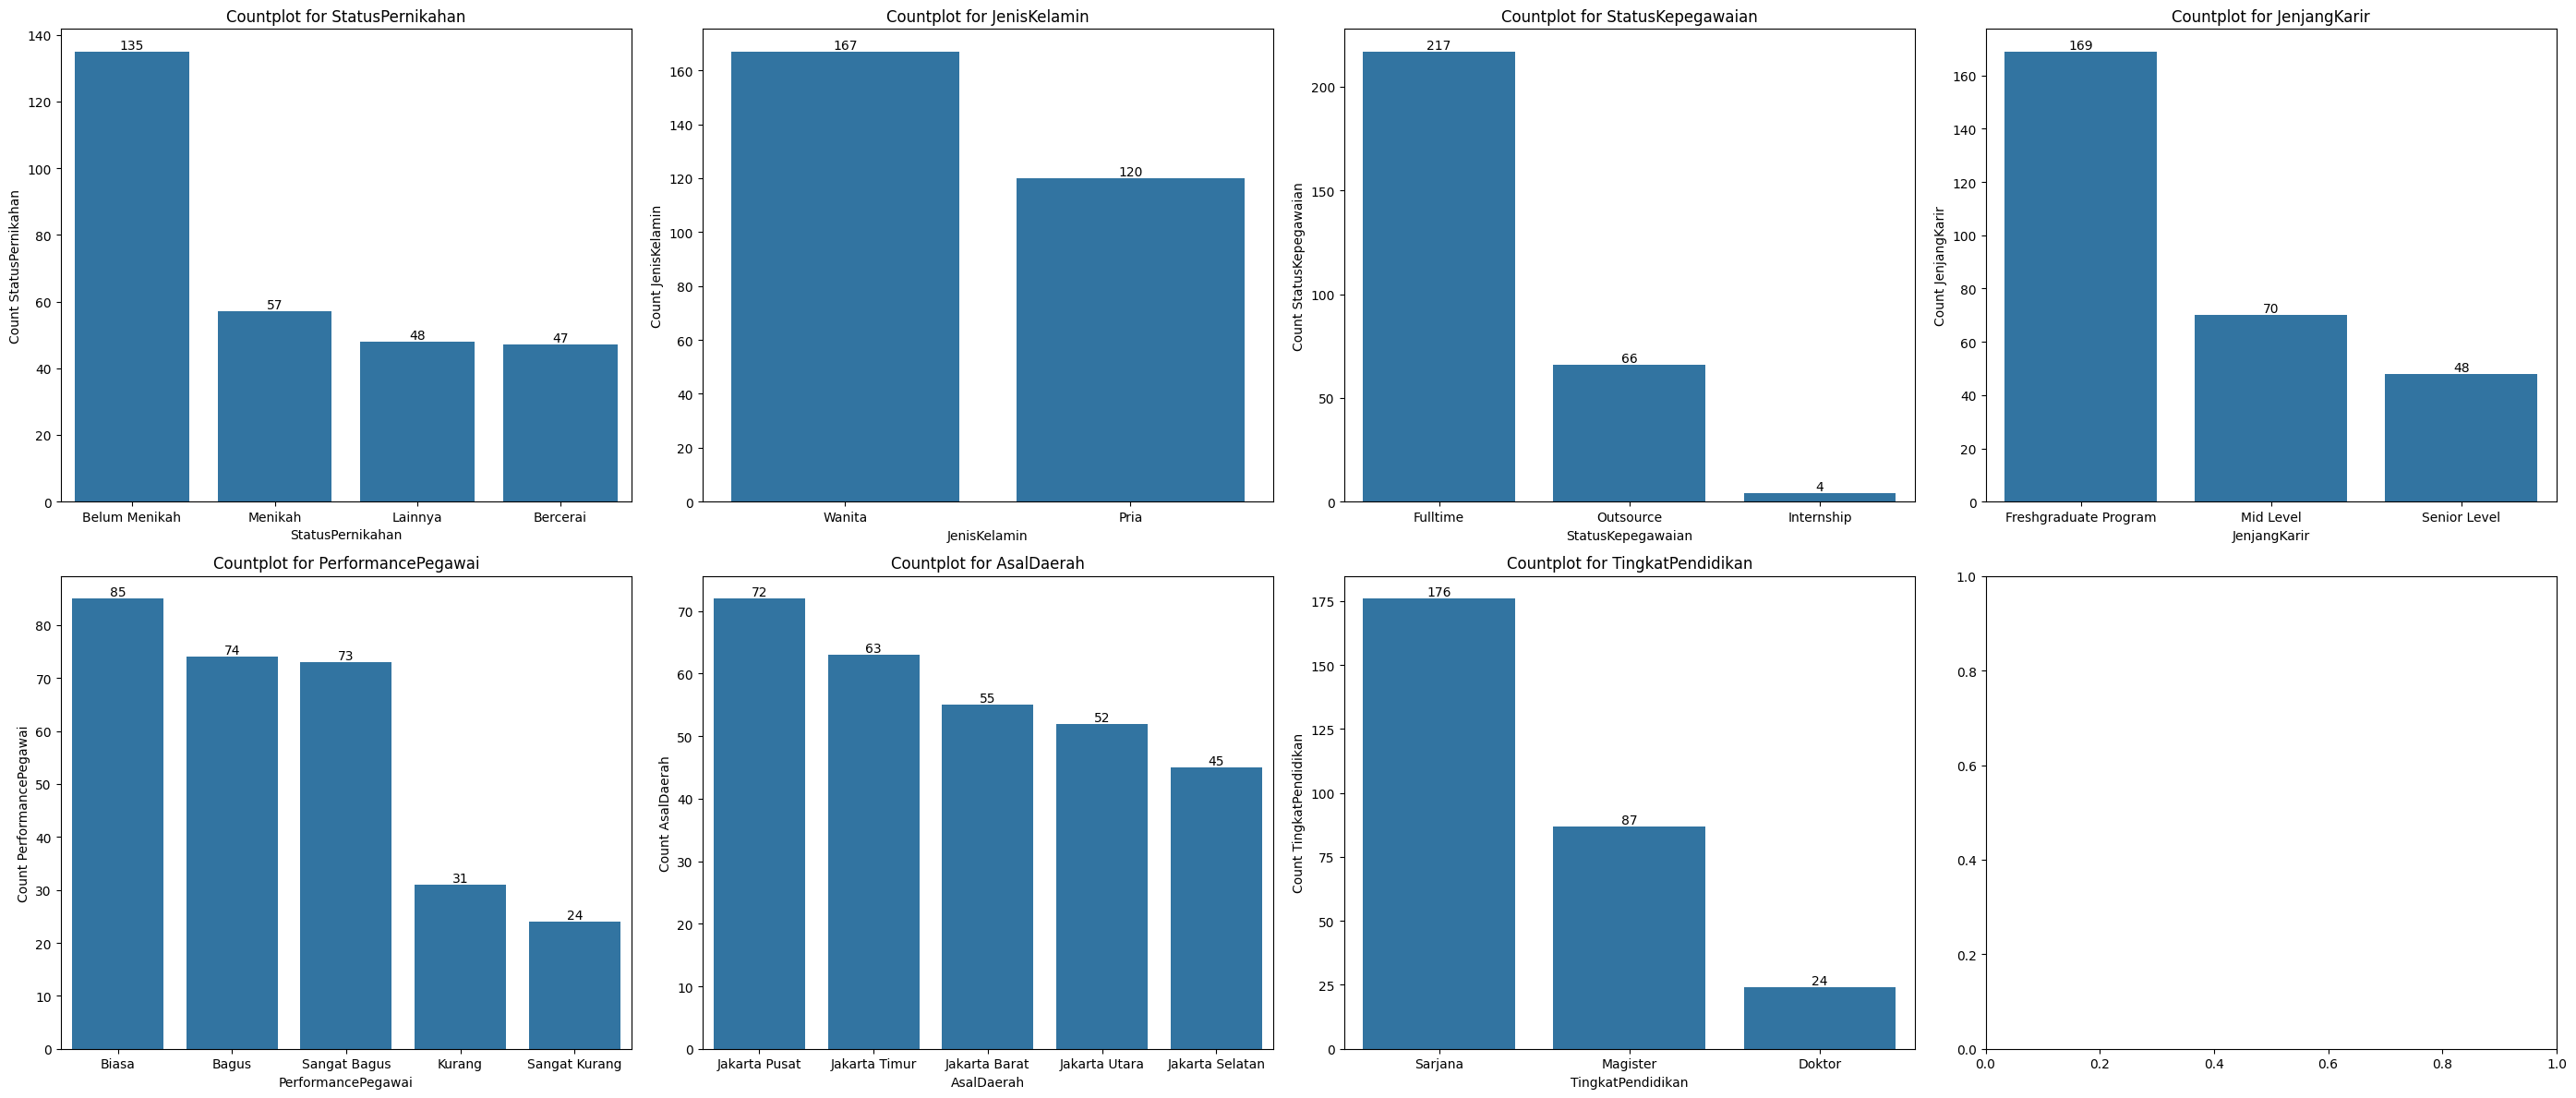

In [71]:
# Categorical Countplot (few unique values)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(28, 12))
ax = ax.flatten()

cats_cols_few = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir',
                'PerformancePegawai', 'AsalDaerah', 'TingkatPendidikan']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

# del ax[7]

plt.tight_layout()
plt.show()

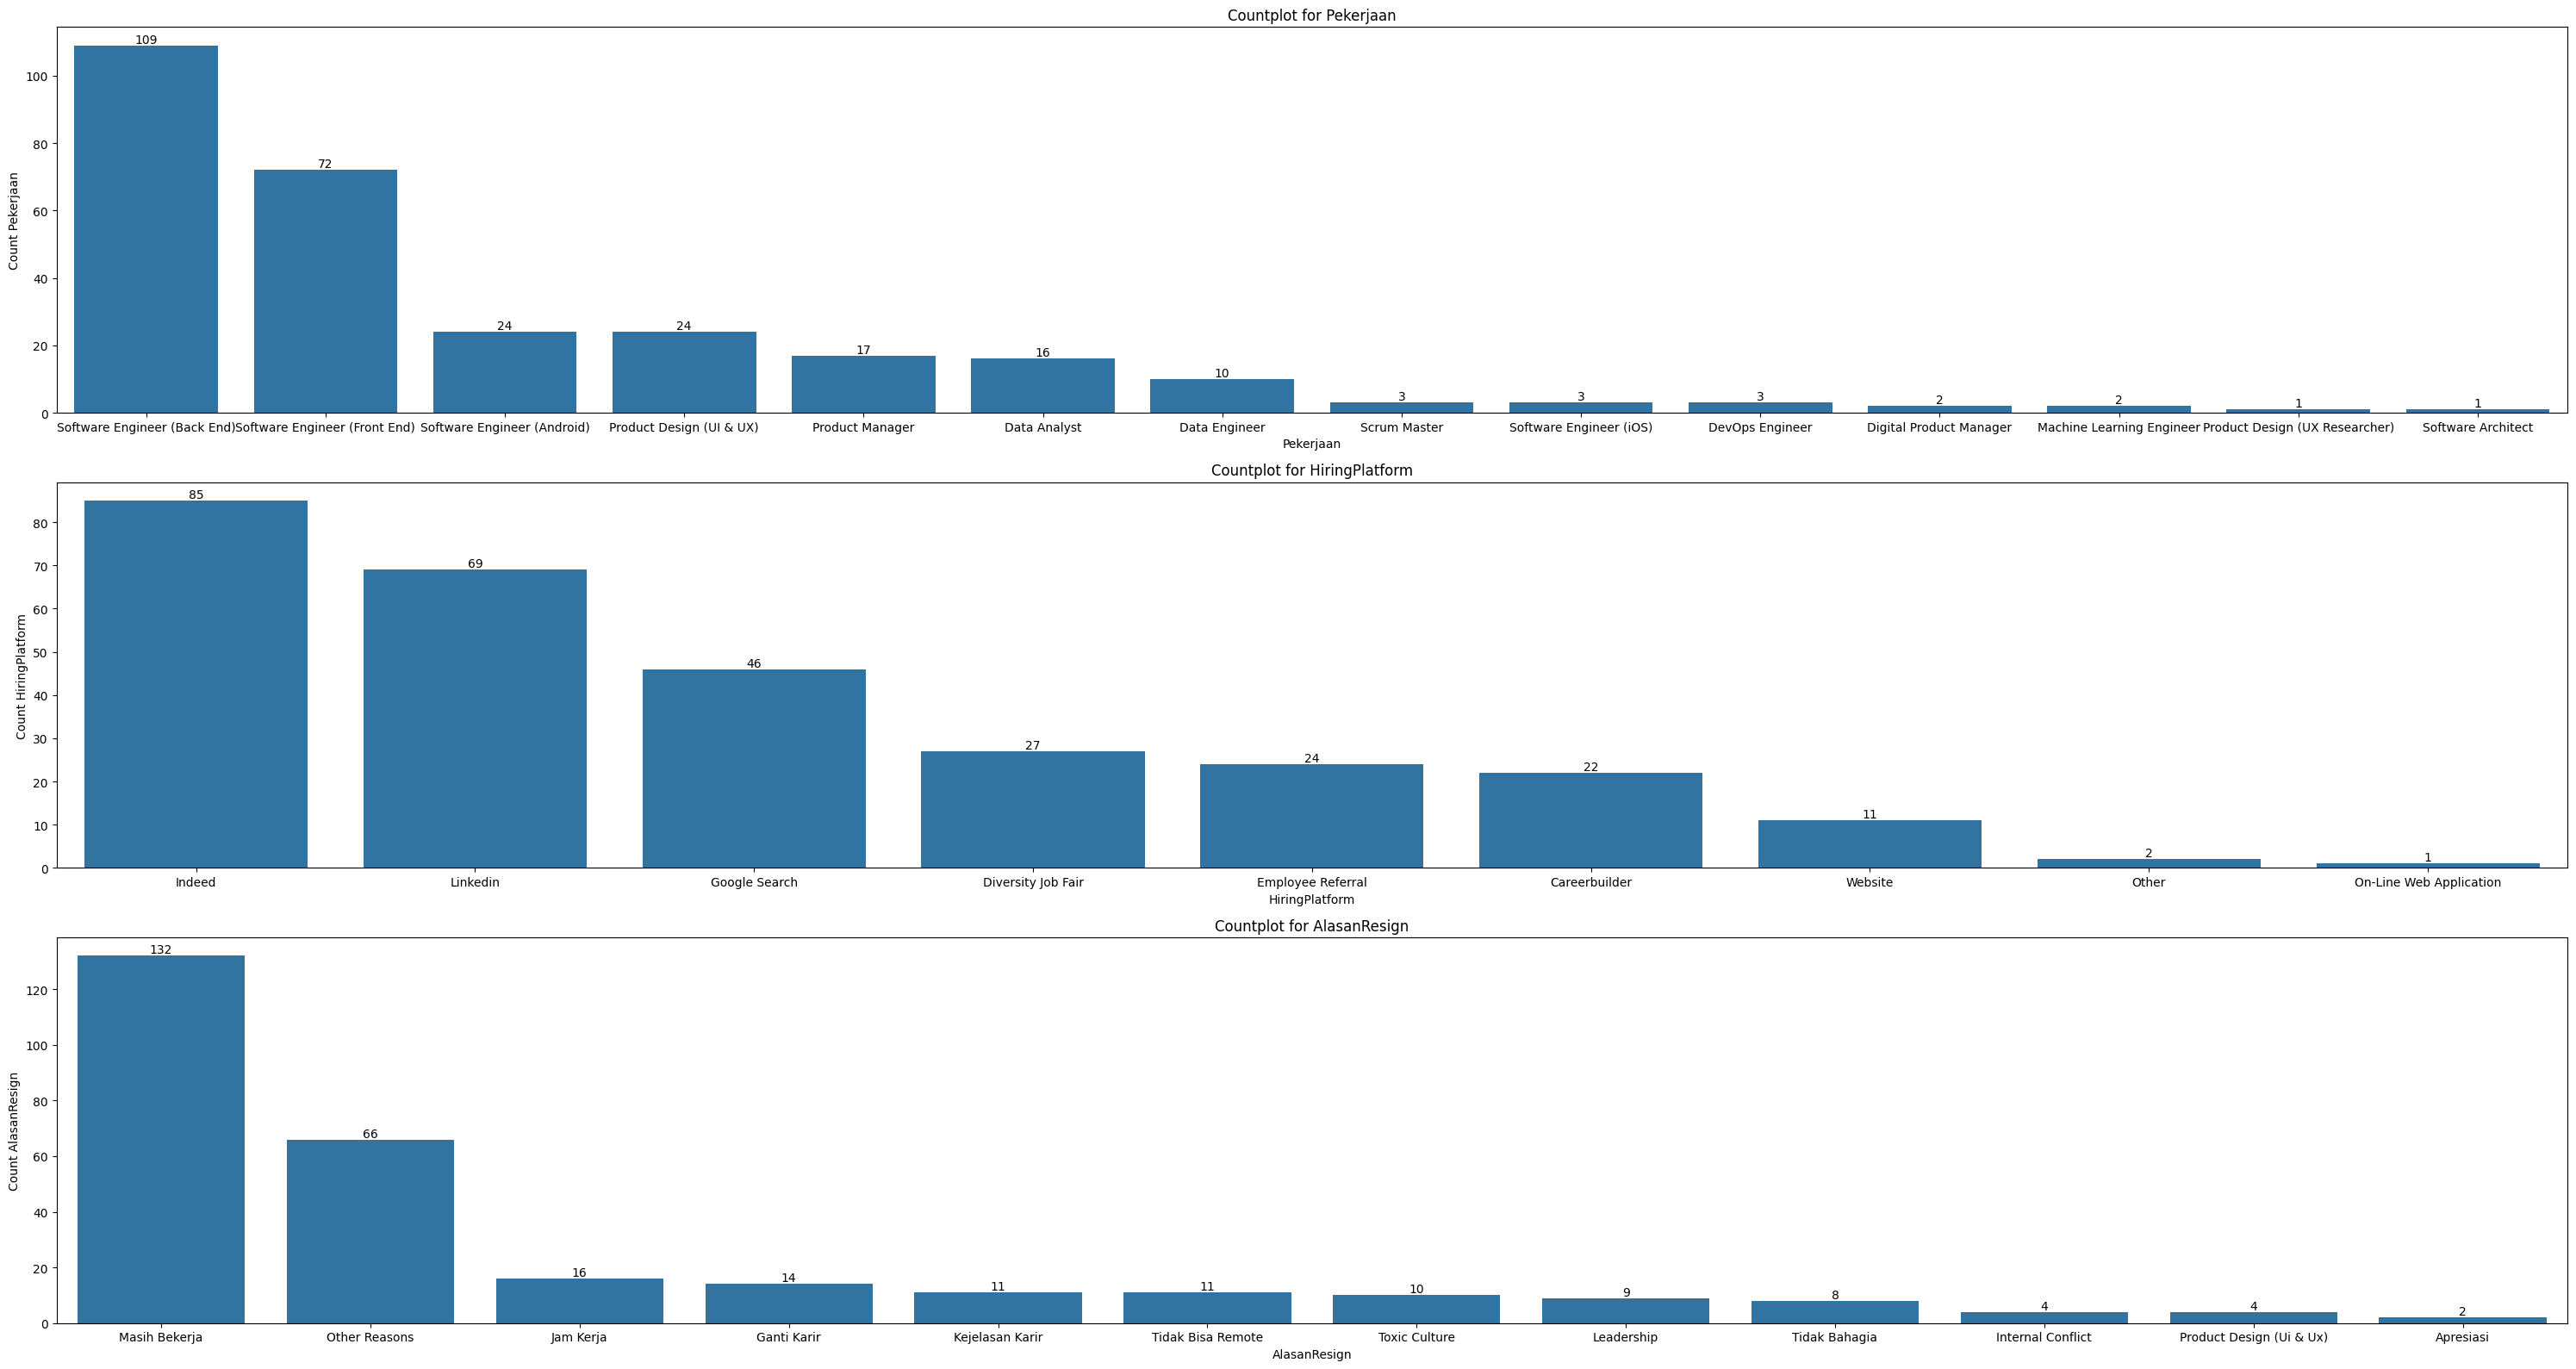

In [72]:
# Categorical Countplot (many unique values)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 16))
ax = ax.flatten()

cats_cols_many = ['Pekerjaan', 'HiringPlatform', 'AlasanResign']

for i, col in enumerate(cats_cols_many):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show()

## Bivariate Analysis

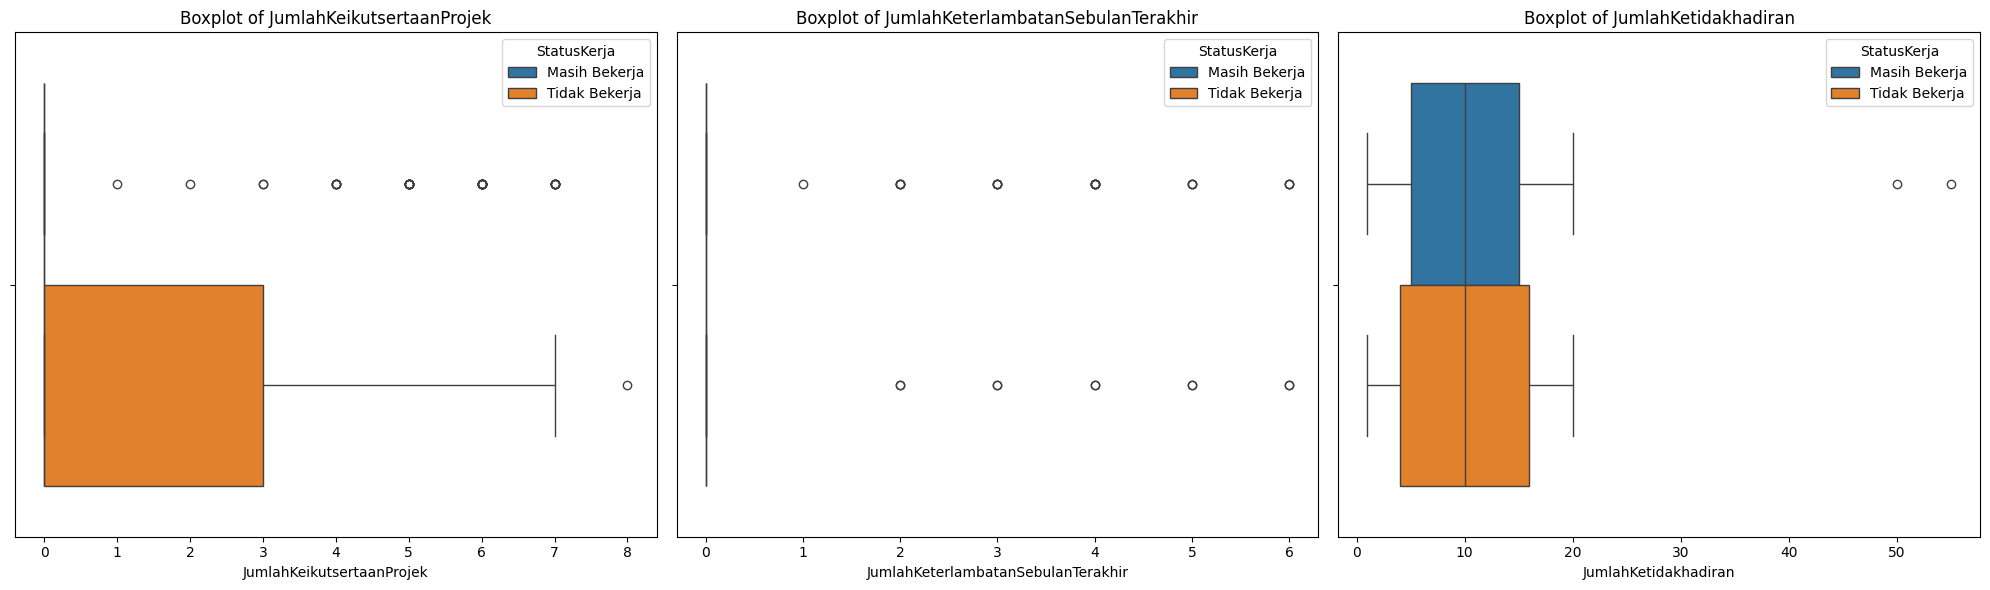

In [75]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='StatusKerja')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

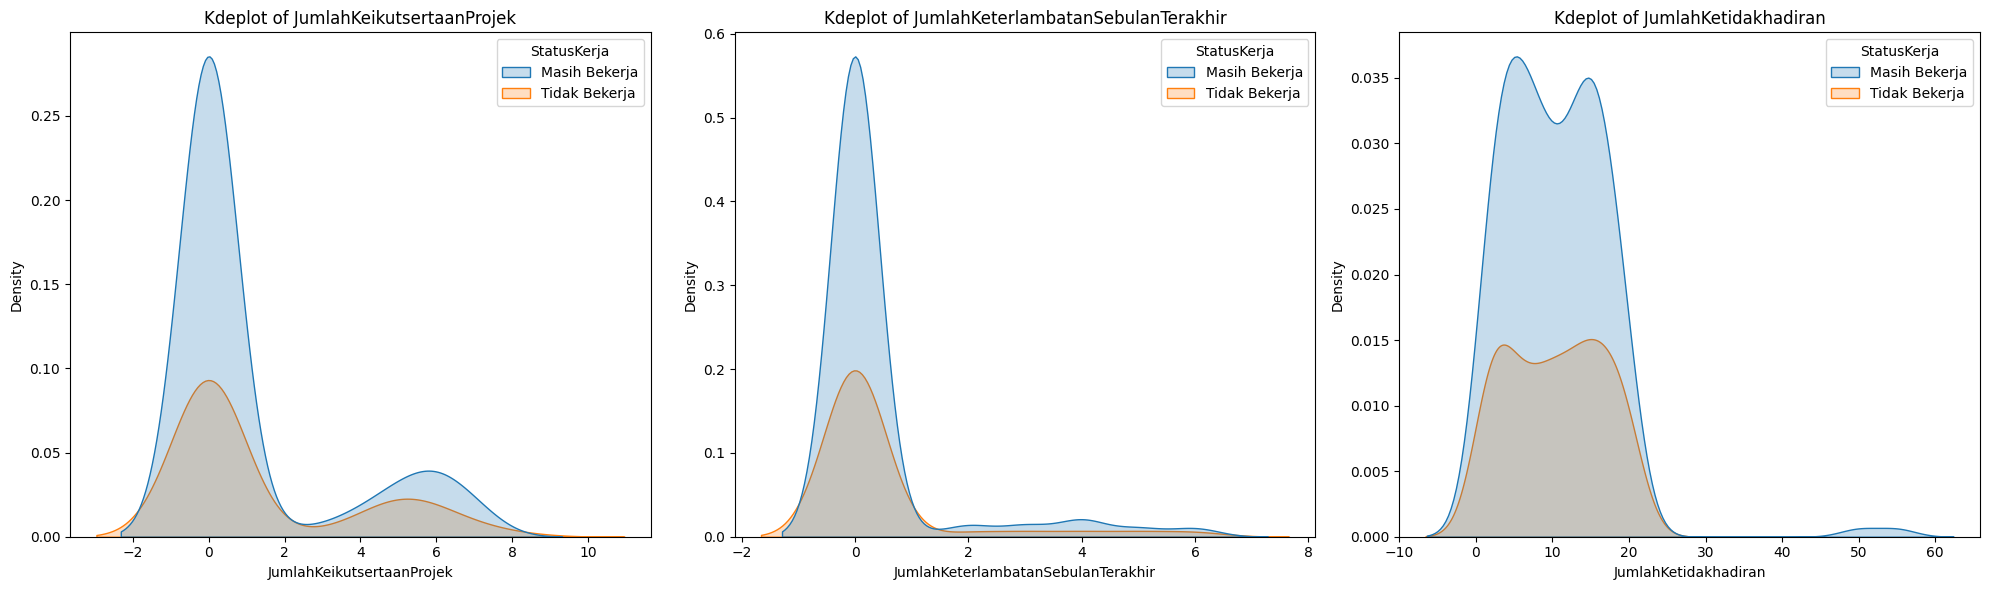

In [80]:
# Kdeplot with hue target
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, ax=ax[i], x=col, hue='StatusKerja', fill=True)
    ax[i].set_title(f'Kdeplot of {col}')

plt.tight_layout()
plt.show()

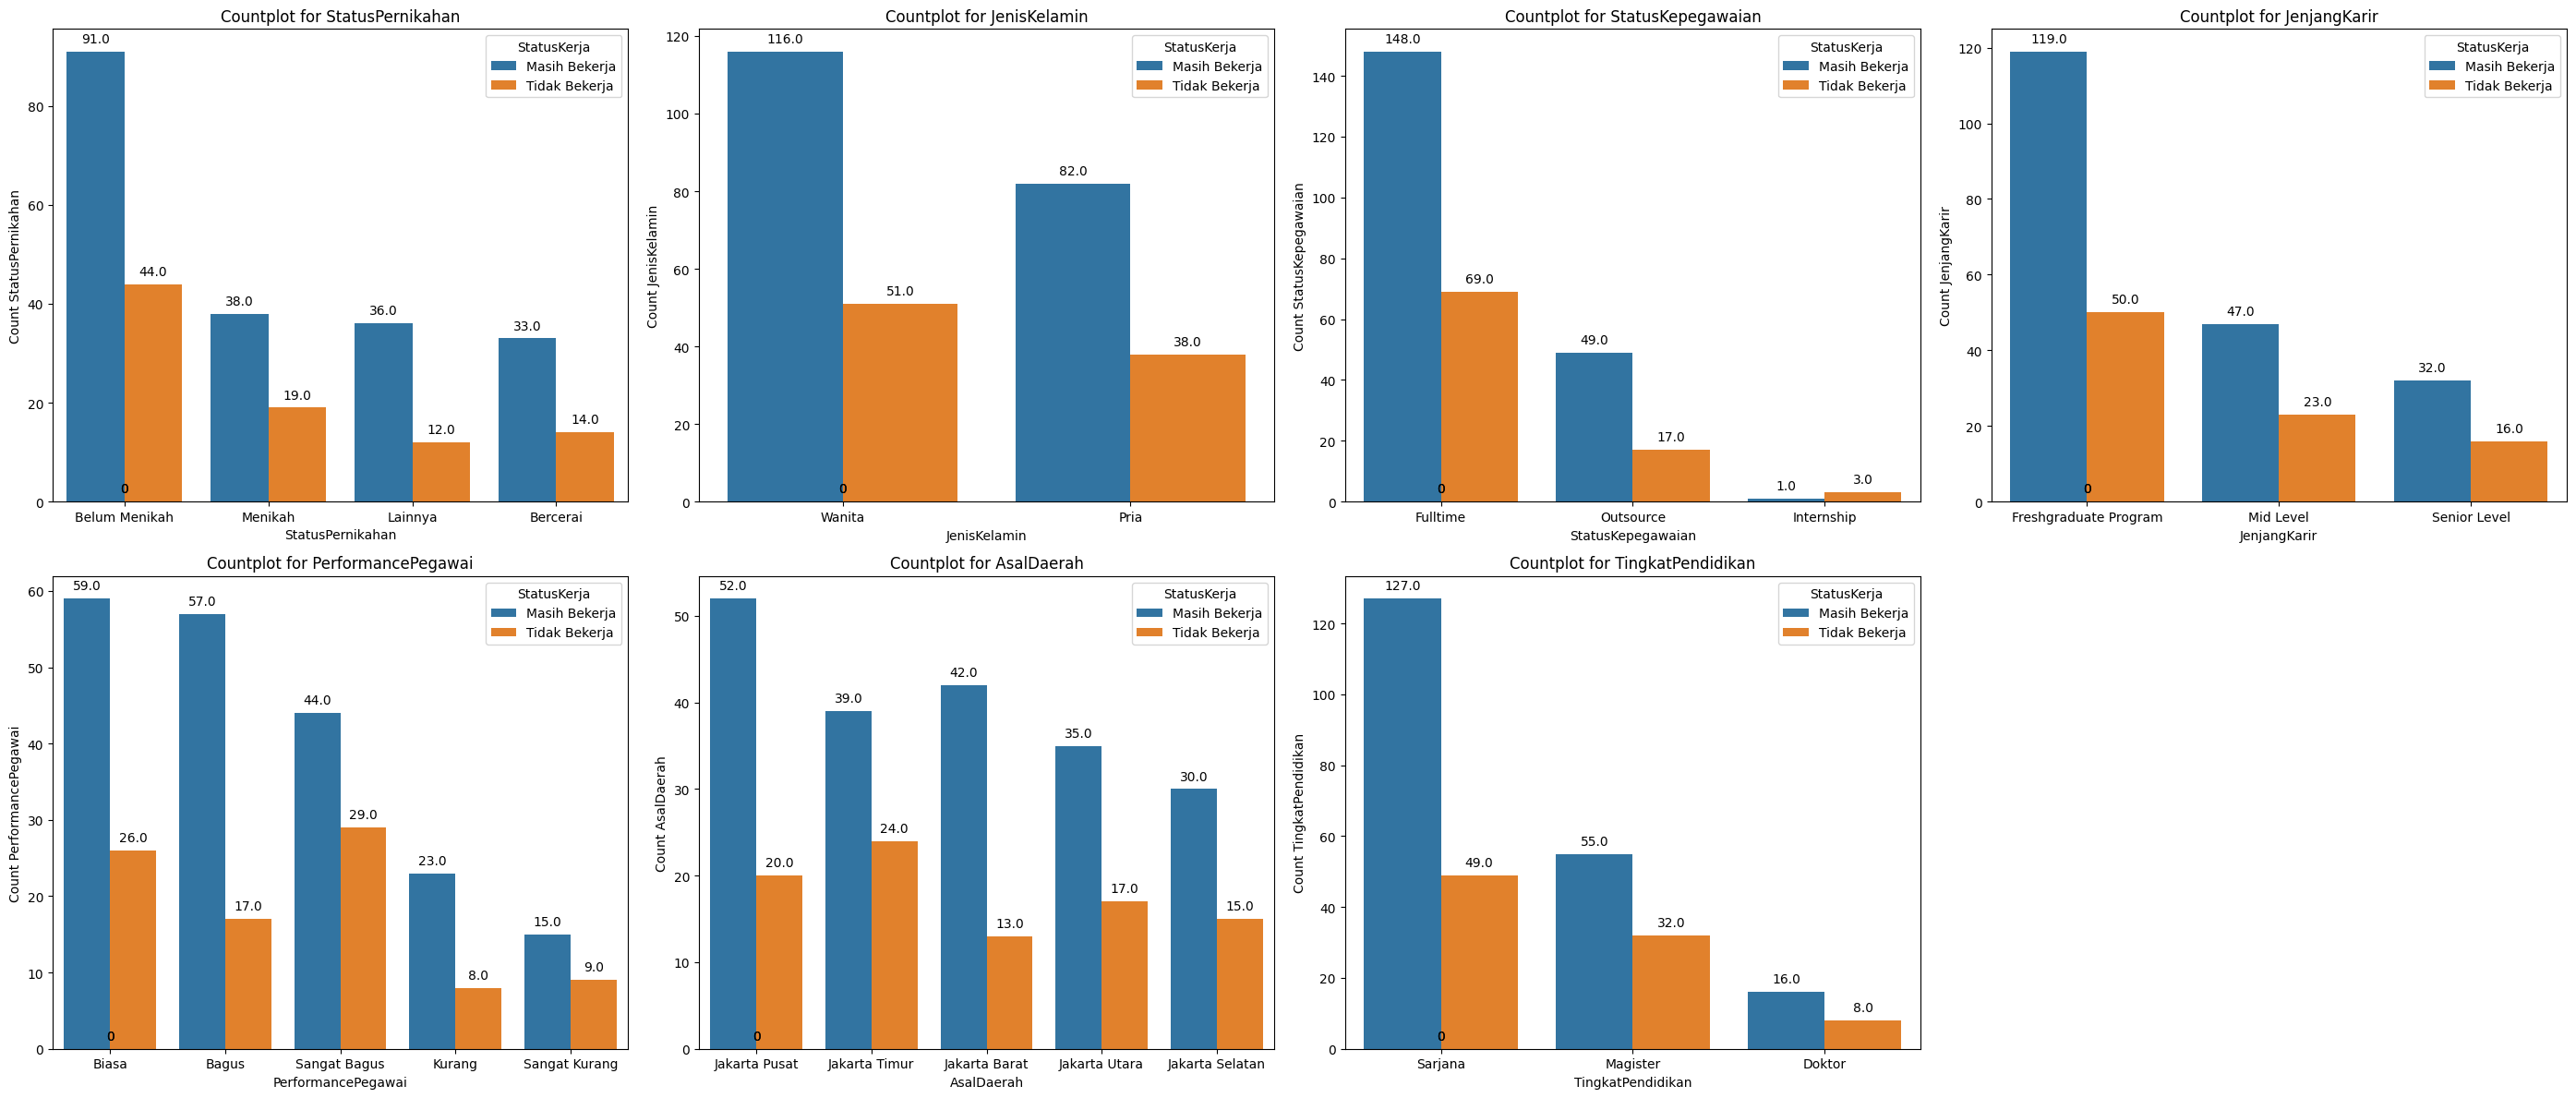

In [84]:
# Categorical Countplot with hue target (few unique values)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(28, 12))
ax = ax.flatten()

cats_cols_few = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir',
                'PerformancePegawai', 'AsalDaerah', 'TingkatPendidikan']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='StatusKerja')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    # ax[i].bar_label(ax[i].containers[0])

    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[7].set_visible(False)
# fig.delaxes(ax[7])

plt.tight_layout()
plt.show()

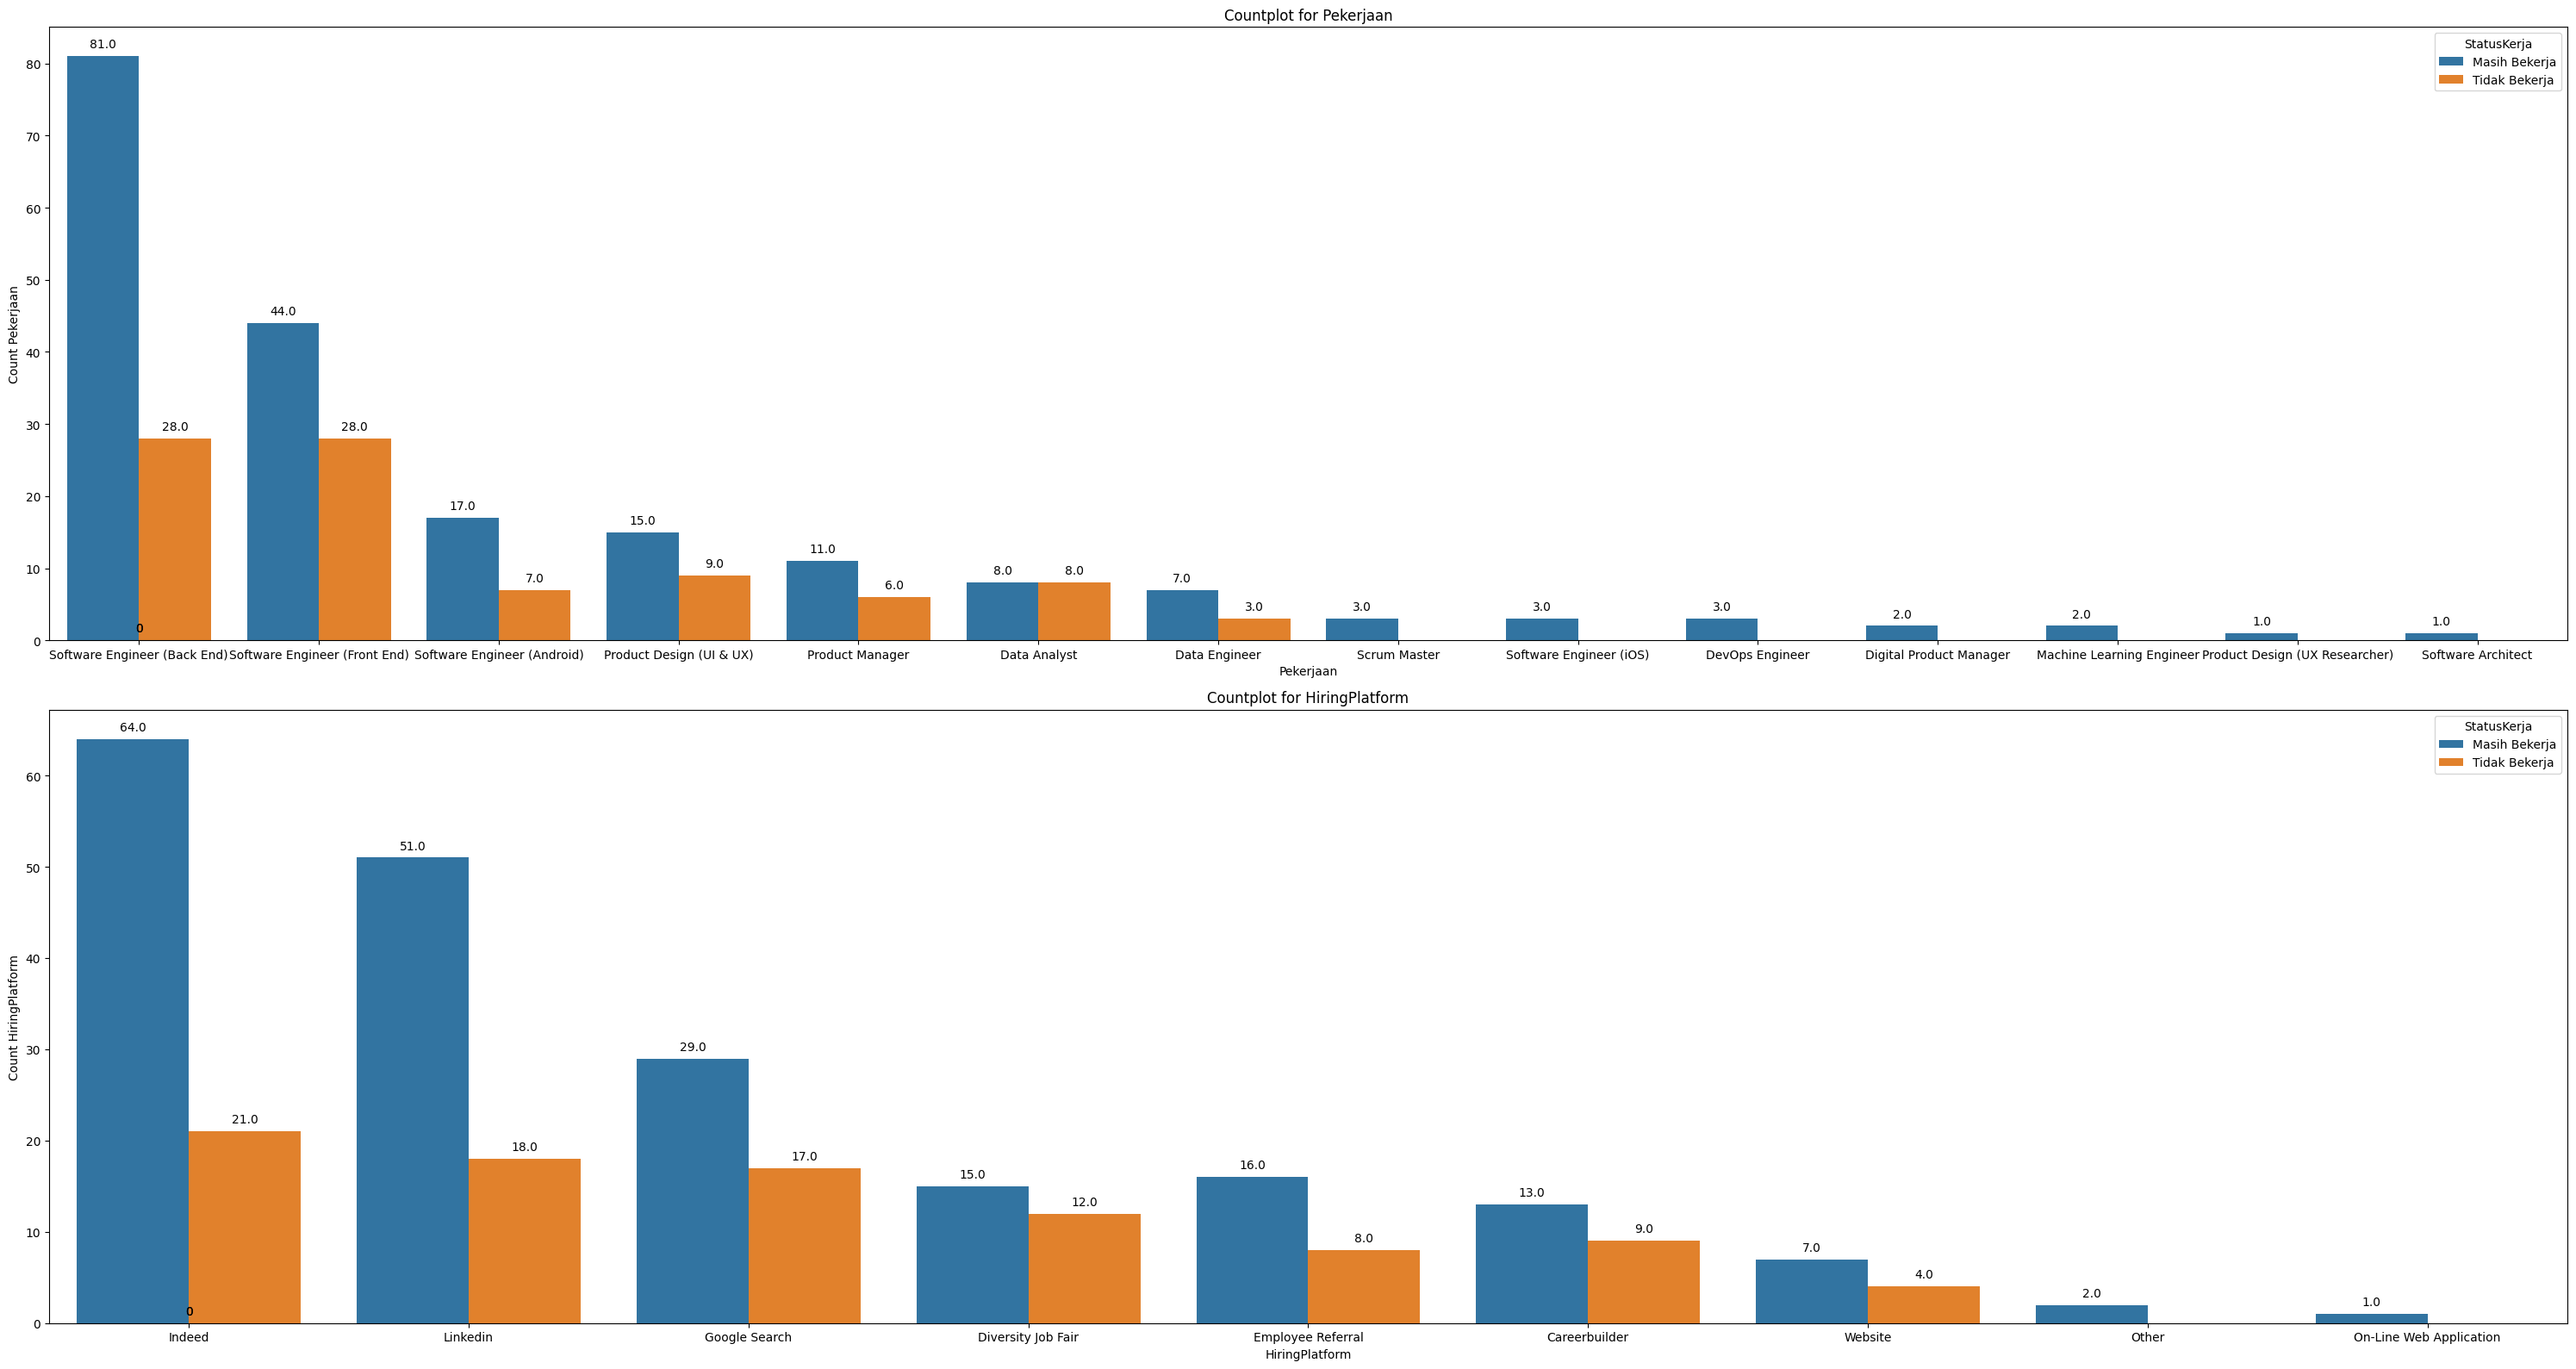

In [ ]:
# Categorical Countplot (many unique values)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 16))
ax = ax.flatten()

cats_cols_many = ['Pekerjaan', 'HiringPlatform']

for i, col in enumerate(cats_cols_many):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='StatusKerja')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    # ax[i].bar_label(ax[i].containers[0])

    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features Using Spearman Method')

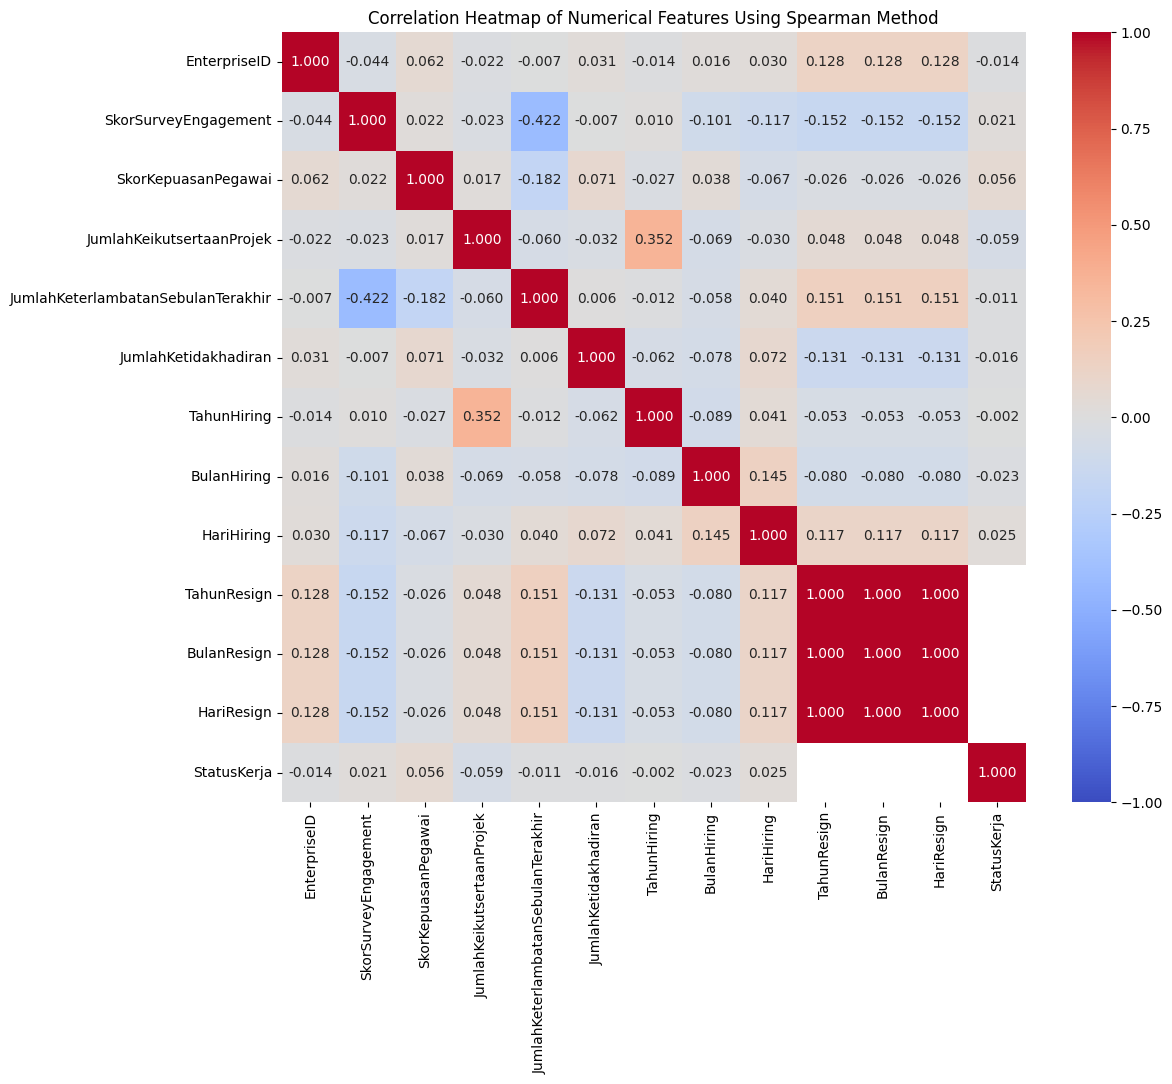

In [87]:
# Heatmap of numerical values (Spearman method)
df['StatusKerja'] = df['StatusKerja'].replace({'Tidak Bekerja' : 0, # Quick label encoding for target
                                                'Masih Bekerja' : 1})

df_1 = df.drop(columns=['StatusKerja'])
df_2 = df['StatusKerja']
df = pd.concat([df_1, df_2], axis=1)

plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

In [85]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'StatusKerja') & (flat_cm['B'] != 'StatusKerja')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

,A,B,Corr Value,Corr Type
0,JumlahKeterlambatanSebulanTerakhir,SkorSurveyEngagement,0.421572,Negative
1,JumlahKeikutsertaanProjek,TahunHiring,0.352457,Positive
2,JumlahKeterlambatanSebulanTerakhir,SkorKepuasanPegawai,0.182065,Negative
3,BulanResign,SkorSurveyEngagement,0.152104,Negative
4,TahunResign,JumlahKeterlambatanSebulanTerakhir,0.151174,Positive
5,HariHiring,BulanHiring,0.145251,Positive
6,HariResign,JumlahKetidakhadiran,0.131038,Negative
7,EnterpriseID,HariResign,0.127735,Positive
8,HariHiring,SkorSurveyEngagement,0.117465,Negative
9,HariHiring,BulanResign,0.116550,Positive


There are no redundant indenpent features to each other.

In [88]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df['StatusKerja'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "StatusKerja"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

,Feature,Corr Value,Corr Type
0,JumlahKeikutsertaanProjek,0.058857,Negative
1,SkorKepuasanPegawai,0.055977,Positive
2,HariHiring,0.025464,Positive
3,BulanHiring,0.022896,Negative
4,SkorSurveyEngagement,0.020519,Positive
5,JumlahKetidakhadiran,0.015525,Negative
6,EnterpriseID,0.014002,Negative
7,JumlahKeterlambatanSebulanTerakhir,0.011223,Negative
8,TahunHiring,0.001850,Negative
9,TahunResign,NaN,Negative


The independent features correlation score to target is very low.

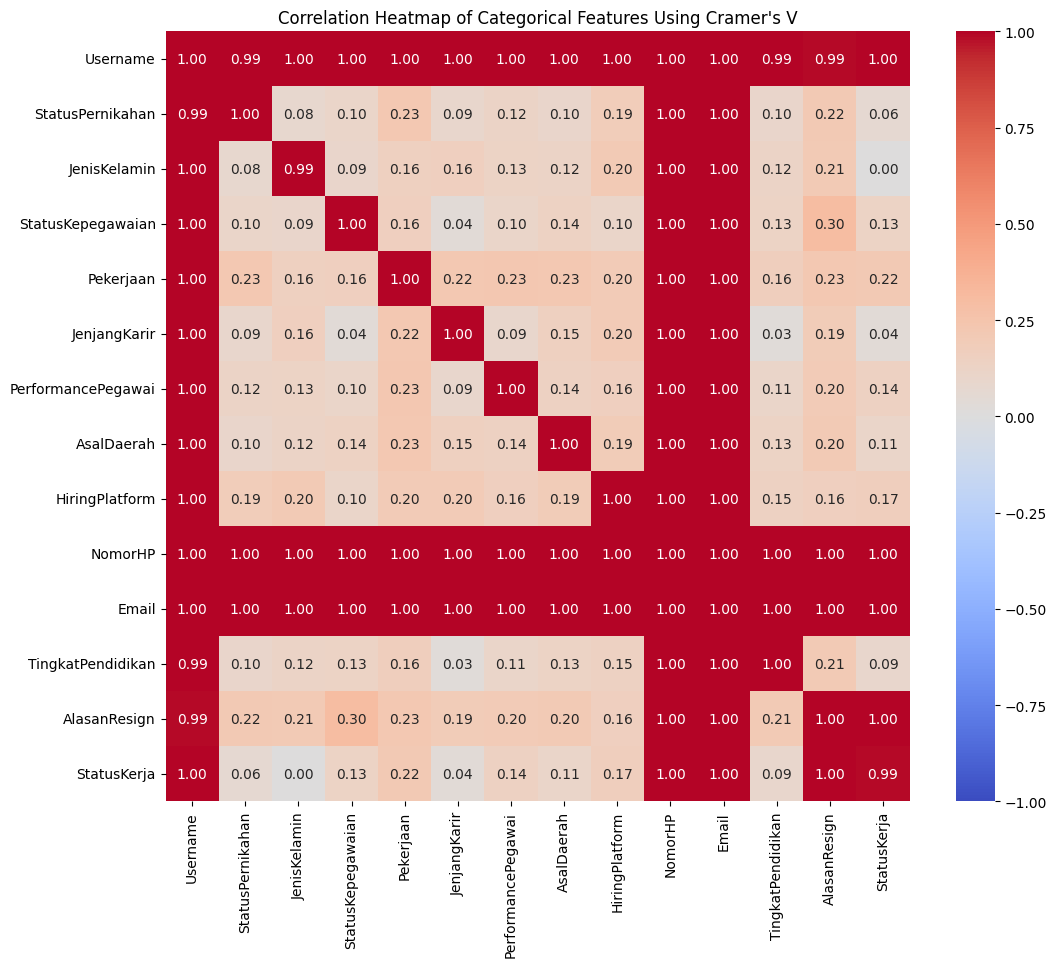

In [89]:
# Checking correlation of categorical features
from scipy import stats

def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

crv=[]
for i in range(len(cats_cols)):
  row=[]
  for j in range(len(cats_cols)):
    val = cramers_v(df[cats_cols[i]], df[cats_cols[j]])
    row.append(val)
  crv.append(row)
df_crv = pd.DataFrame(data=crv, columns=cats_cols, index=cats_cols)


plt.figure(figsize=(12, 10))
sns.heatmap(df_crv, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V")
plt.show()

All categorical features (non-encoded) have very weak relationship to target variable.

# **STAGE 2 : DATA PREPROCESSING**

After we are done with the EDA process, we could drop several columns that will not be using in further process.

In [79]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,TahunHiring,BulanHiring,HariHiring,TahunResign,BulanResign,HariResign
140,selfishApples3,110842,Belum Menikah,Wanita,Outsource,Software Engineer (Back End),Senior Level,Sangat Bagus,Jakarta Timur,Employee Referral,4,4,5,0,11,+6289591398xxx,selfishApples3642@hotmail.com,Magister,Masih Bekerja,1981-04-16,2015-01-05,2020-01-28,NaT,Masih Bekerja,2015,1,5,NaN,NaN,NaN
1,jealousGelding2,106080,Belum Menikah,Pria,Fulltime,Data Analyst,Freshgraduate Program,Sangat Kurang,Jakarta Utara,Website,4,4,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,Toxic Culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,Tidak Bekerja,2014,1,6,2018.0,2018.0,2018.0
132,stressedBittern3,110774,Belum Menikah,Wanita,Outsource,Data Engineer,Freshgraduate Program,Sangat Bagus,Jakarta Pusat,Linkedin,3,4,5,0,1,+6285838402xxx,stressedBittern3064@yahoo.com,Magister,Apresiasi,1968-07-06,2010-05-01,2020-02-01,2017-04-15,Tidak Bekerja,2010,5,1,2017.0,2017.0,2017.0
250,jubilantTeal7,106547,Lainnya,Pria,Fulltime,DevOps Engineer,Freshgraduate Program,Bagus,Jakarta Barat,Employee Referral,3,3,7,0,16,+6287898271xxx,jubilantTeal7049@hotmail.com,Magister,Other Reasons,1970-02-08,2015-01-05,2020-01-14,NaT,Masih Bekerja,2015,1,5,NaN,NaN,NaN
107,finickyRat1,100610,Belum Menikah,Wanita,Fulltime,Software Engineer (Android),Freshgraduate Program,Bagus,Jakarta Timur,Careerbuilder,3,5,5,0,8,+6283263312xxx,finickyRat1900@icloud.com,Sarjana,Masih Bekerja,1979-07-05,2012-01-09,2020-01-25,NaT,Masih Bekerja,2012,1,9,NaN,NaN,NaN


## Feature Encoding

In [80]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan',
                    'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
                    'TingkatPendidikan', 'AlasanResign', 'StatusKerja']

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======StatusPernikahan=======
['Belum Menikah' 'Menikah' 'Bercerai' 'Lainnya']

=======JenisKelamin=======
['Pria' 'Wanita']

=======StatusKepegawaian=======
['Outsource' 'Fulltime' 'Internship']

=======Pekerjaan=======
['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer']

=======JenjangKarir=======
['Freshgraduate Program' 'Senior Level' 'Mid Level']

=======PerformancePegawai=======
['Sangat Bagus' 'Sangat Kurang' 'Bagus' 'Biasa' 'Kurang']

=======AsalDaerah=======
['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat']

=======HiringPlatform=======
['Employee Referral' 'Website' 'Indeed' 'Linkedin' 'Careerbuilder'
 'Diversity Job Fair' 'Google Search' 'On-Line Web App

In [ ]:
# Label encoding for ordinal categorical and target variable
df_preprocessed['JenisKelamin'] = df_preprocessed['JenisKelamin'].replace({'Wanita' : 0,
                                                                            'Pria' : 1})

df_preprocessed['JenjangKarir'] = df_preprocessed['JenjangKarir'].replace({'Freshgraduate Program' : 0,
                                                                            'Mid Level' : 1,
                                                                            'Senior Level' : 2})


df_preprocessed['PerformancePegawai'] = df_preprocessed['PerformancePegawai'].replace({'Sangat Kurang' : 0,
                                                                                        'Kurang' : 1,
                                                                                        'Biasa' : 2,
                                                                                        'Bagus' : 3,
                                                                                        'Sangat Bagus' : 4})

df_preprocessed['TingkatPendidikan'] = df_preprocessed['TingkatPendidikan'].replace({'Sarjana' : 0,
                                                                                    'Magister' : 1,
                                                                                    'Doktor' : 2})

In [ ]:
# One-hot encoding for nominal categorical
one_hot_columns = ['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'AlasanResign']

for col in one_hot_columns :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col)
    onehots = onehots.astype(int)
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(one_hot_columns, axis=1, inplace=True)